In [5]:
from google.colab import files
uploaded = files.upload()

Saving Data Science Job Salaries.zip to Data Science Job Salaries.zip


In [6]:
import zipfile
import io
zip_file_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/')
    import os
os.listdir('/content/')

['.config', 'ds_salaries.csv', 'Data Science Job Salaries.zip', 'sample_data']

In [7]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [8]:
df.info() # Быстрый чек: сколько строк/столбиков, какие типы данных, что по пропускам
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


(607, 12)

In [15]:
quantitative = df.select_dtypes(include=['int64', 'float64']).columns.tolist() # где цифры (quantitative), а где текст/категории (qualitative)
qualitative = df.select_dtypes(include=['object']).columns.tolist()

print("Quantitative (numeric) columns:", quantitative)
print("Qualitative (text) columns:", qualitative)

Quantitative (numeric) columns: ['Unnamed: 0', 'work_year', 'salary', 'salary_in_usd', 'remote_ratio']
Qualitative (text) columns: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


In [10]:
print("Missing values:\n", df.isnull().sum()) # проверка принтом
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Missing values:
 Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Duplicate rows: 0


In [11]:
salary_stats = df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median']).reset_index()
salary_stats #  средняя и медиана зп по каждому уровню опыта

,experience_level,mean,median
0,EN,61643.318182,56500.0
1,EX,199392.038462,171437.5
2,MI,87996.056338,76940.0
3,SE,138617.292857,135500.0


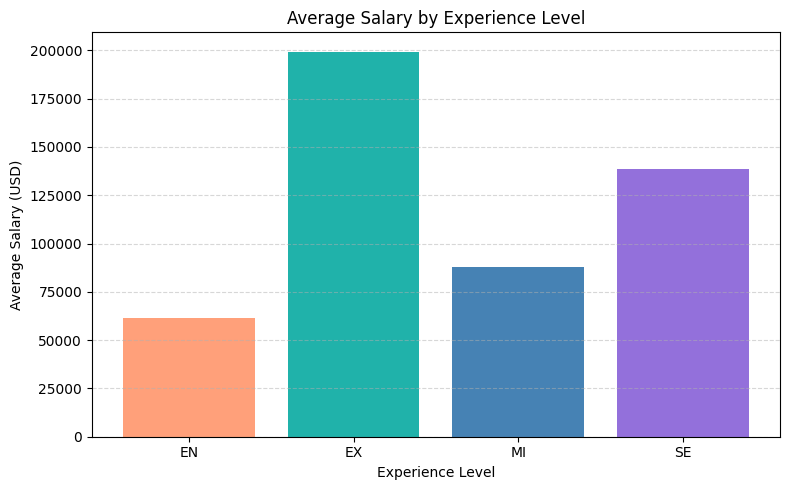

In [12]:
import matplotlib.pyplot as plt #рисуем визуал в зависимости от опыта

plt.figure(figsize=(8, 5))
plt.bar(salary_stats['experience_level'], salary_stats['mean'], color=['#FFA07A', '#20B2AA', '#4682B4', '#9370DB'])
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Final Thoughts

# 1. Not gonna lie, this dataset was pretty clean from the start — no missing values, just a couple of duplicate rows that were easy to drop.

# 2. The most interesting bit was seeing how sharply salaries go up for the executive level. Like, no surprise there, but it’s cool to see the exact numbers.

# 3. Also, median vs mean showed a bit of a gap, so I’d definitely keep that in mind for any real-life salary insights — especially since big outliers can skew the averages.

# 4. Honestly, without the bar chart it would've been harder to get the whole picture — that quick visual just made the difference.
